# **1. Perkenalan Dataset**


Dataset yang digunakan adalah **Online Retail Dataset** yang berasal dari UCI Machine Learning Repository dan tersedia di Kaggle. Dataset ini berisi data transaksi dari sebuah perusahaan ritel online yang berbasis di Inggris selama periode 1 Desember 2010 hingga 9 Desember 2011.

Dataset ini dipilih karena mengandung informasi penting yang dibutuhkan dalam membangun sistem product recommendation, seperti riwayat transaksi pelanggan, produk yang dibeli, dan waktu pembelian. Dengan menganalisis pola pembelian pelanggan, sistem dapat merekomendasikan produk yang relevan berdasarkan kebiasaan dan preferensi pelanggan.

### Sumber Dataset
- **Nama Dataset**: Online Retail Dataset  
- **Sumber Asli**: UCI Machine Learning Repository  
- **Diakses melalui**: Kaggle
- **Periode Data**: Desember 2010 – Desember 2011   
- **Link**: [https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset)

# **2. Import Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

# **3. Memuat Dataset**

In [6]:
# Load dataset
df = pd.read_csv('online_retail_raw.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **4. Exploratory Data Analysis (EDA)**

## Informasi Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Dataset ini terdiri dari sekitar **541.909 baris** dan beberapa kolom berikut:

#### Kolom Kategorikal :
- `InvoiceNo` – Nomor faktur (unik untuk setiap transaksi)
- `StockCode` – Kode produk
- `Description` – Nama atau deskripsi produk
- `InvoiceDate` – Tanggal dan waktu transaksi
- `Country` – Negara tempat pelanggan berada
  
#### Kolom Numerik :
- `Quantity` – Jumlah produk yang dibeli per transaksi
- `UnitPrice` – Harga per unit produk (dalam Pound Sterling)
- `CustomerID` – ID pelanggan (beberapa baris tidak memiliki ID)

## Distribusi Data

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Berdasarkan tabel di atas, diperoleh bahwa :

1. **Quantity (Jumlah Produk)**
   - Rata-rata jumlah produk yang dibeli dalam satu transaksi adalah sekitar 9 unit.
   - Ditemukan nilai ekstrem, yaitu jumlah paling sedikit sebesar -80.995 dan paling banyak 80.995 unit. Hal ini mengindikasikan adanya kemungkinan data tidak valid atau pengembalian barang (return) yang perlu dibersihkan pada tahap pra-pemrosesan.

2. **Unit Price (Harga Produk per Unit)**
   - Harga rata-rata produk adalah sekitar £4.60.
   - Terdapat harga negatif hingga -£11.062,06, yang kemungkinan merupakan kesalahan pencatatan atau data return/refund.
   - Harga tertinggi tercatat mencapai £38.970, namun nilai ini termasuk outlier.
   - Median harga produk adalah £2.08, dan sebanyak 75% produk dijual di bawah harga £4.13 per unit, yang menunjukkan bahwa sebagian besar produk merupakan barang dengan harga rendah atau terjangkau.

Secara keseluruhan, data menunjukkan adanya ketidakwajaran pada nilai Quantity dan Unit Price, sehingga perlu dilakukan data cleaning untuk menghapus nilai negatif atau outlier yang tidak representatif sebelum membangun sistem rekomendasi produk.

## Cek Missing Value

In [15]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dari pengecekan missing value di atas, didapatkan bahwa data memiliki missing value pada kolom Description dan CustomerID.  
- Kolom Description kosong kemungkinan disebabkan oleh kesalahan pencatatan produk atau transaksi yang tidak terekam dengan baik. Karena kolom ini penting untuk analisis berbasis konten (content-based filtering), maka baris dengan nilai kosong pada kolom ini akan dihapus.  
- Kolom CustomerID memiliki cukup banyak nilai kosong, yang mengindikasikan bahwa beberapa transaksi dilakukan oleh pelanggan anonim atau belum terdaftar. Untuk kebutuhan sistem rekomendasi berbasis pelanggan (seperti collaborative filtering), baris tanpa CustomerID akan dihapus, karena tidak dapat digunakan untuk membentuk profil pelanggan.

Selanjutnya, akan dicek apakah terdapat duplikasi pada data. Duplikasi ini dapat terjadi jika transaksi terekam lebih dari sekali, baik karena kesalahan sistem maupun penggabungan data dari sumber berbeda. Jika ditemukan baris duplikat, maka baris tersebut akan dihapus agar tidak mempengaruhi akurasi model dan distribusi data.

## Cek Duplikasi Data

In [18]:
print("Jumlah Duplikasi Data:", df.duplicated().sum())

Jumlah Duplikasi Data: 5268


Setelah dilakukan pengecekan duplikasi data, terlihat bahwa ada 5.268 baris data yang terduplikasi. Duplikasi ini kemungkinan terjadi karena pencatatan transaksi yang berulang atau kesalahan input data.  Kelima ribu lebih data duplikat ini nantinya akan dihapus pada saat tahap data preprocessing, agar tidak mempengaruhi distribusi data dan hasil analisis, terutama dalam membangun sistem rekomendasi yang akurat.

## Deteksi Outlier

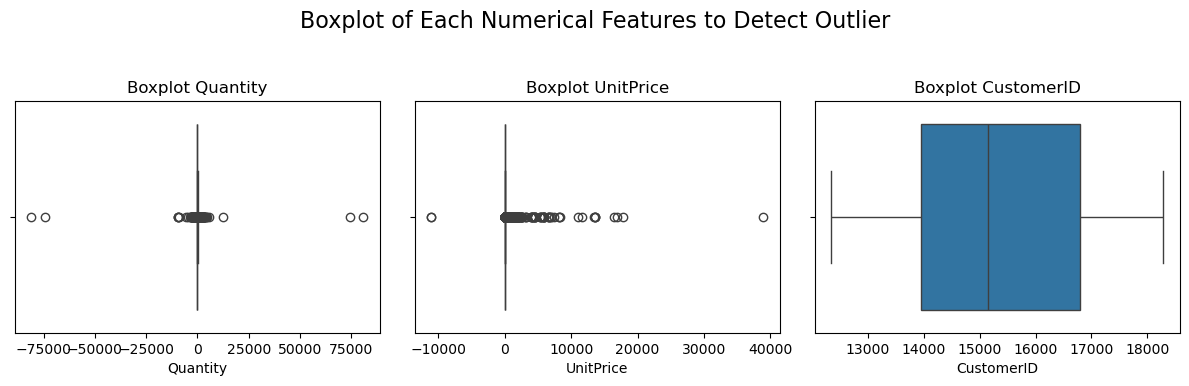

In [21]:
# Kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi boxplot untuk deteksi outlier
plt.figure(figsize=(12, 9))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')

plt.suptitle('Boxplot of Each Numerical Features to Detect Outlier', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Berdasarkan analisis boxplot, ditemukan bahwa beberapa fitur numerik seperti `Quantity` dan `UnitPrice`  memiliki nilai outlier yang berada di luar rentang sebaran mayoritas data.

Setelah itu, akan dilakukan visualisasi distribusi untuk setiap kolom numerik dengan menggunakan histogram agar dapat memahami pola sebaran data, mengidentifikasi adanya skewness (kemiringan) serta melihat tren umum seperti nilai-nilai yang paling sering muncul (modus).

## Distribusi Kolom Numerik

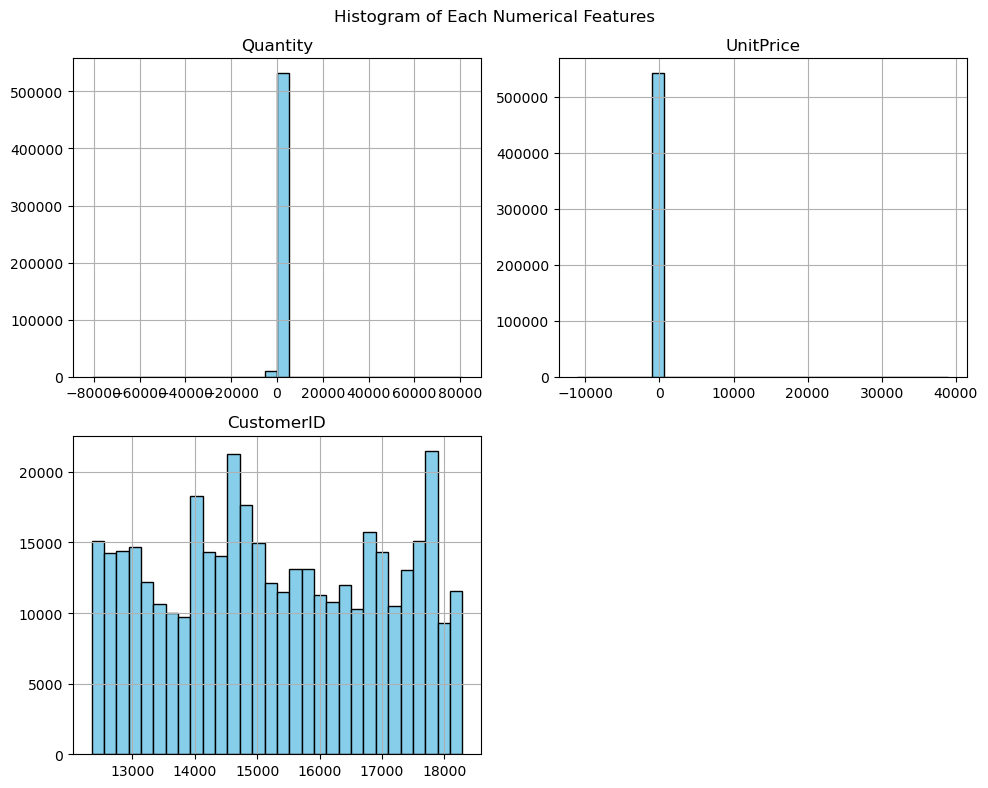

In [25]:
# Visualisasi histogram untuk melihat distribusi kolom numerik
df.hist(bins=30, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Each Numerical Features", fontsize=12)
plt.tight_layout()
plt.show()

Berdasarkan histogram yang ditampilkan untuk fitur numerik pada dataset Online Retail, diperoleh insight sebagai berikut:

#### 1. Quantity (Jumlah Produk)
- Sebagian besar transaksi memiliki jumlah produk dalam rentang positif yang rendah, menunjukkan pola pembelian normal.
- Terdapat outlier ekstrem di sisi negatif dan positif, dengan nilai mencapai -80.000 hingga +80.000, yang sangat tidak wajar untuk skala transaksi ritel.
- Hal ini menunjukkan adanya kemungkinan kesalahan pencatatan atau transaksi retur, sehingga perlu dilakukan filtering data dengan Quantity ≤ 0 pada tahap preprocessing.

#### 2. Unit Price (Harga Produk per Unit)
- Harga produk sebagian besar berada dalam rentang rendah dan mendekati nol.
- Terdapat nilai negatif dan outlier yang sangat tinggi hingga mencapai £38.970, yang secara logika tidak valid untuk harga satuan produk.
- Nilai-nilai yang tidak wajar ini menunjukkan pentingnya membersihkan data yang memiliki harga ≤ 0 atau outlier ekstrem.

#### 3. CustomerID
- Distribusi CustomerID relatif merata, menunjukkan bahwa tidak ada dominasi pelanggan tertentu dalam jumlah transaksi.
- Tidak ditemukan outlier mencolok, tetapi diketahui bahwa beberapa baris tidak memiliki nilai CustomerID.
- Karena model rekomendasi berbasis pelanggan memerlukan identitas pengguna, maka baris tanpa CustomerID akan dihapus selama preprocessing.

Selain distribusi untuk kolom numerik, akan dilakukan pula visualisasi untuk distribusi pada kolom kategorikal yang meliputi `InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, dan `Country`.

## Distribusi Kolom Kategorikal

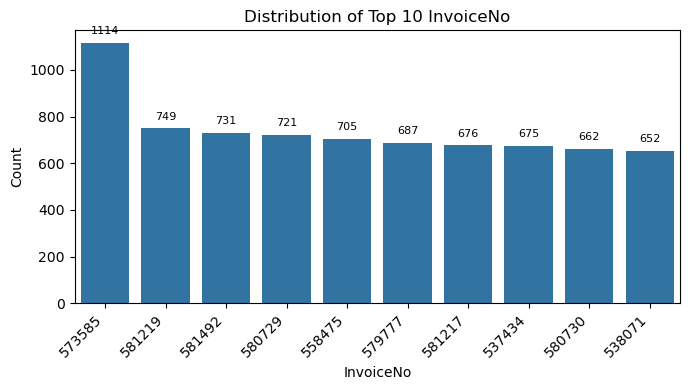

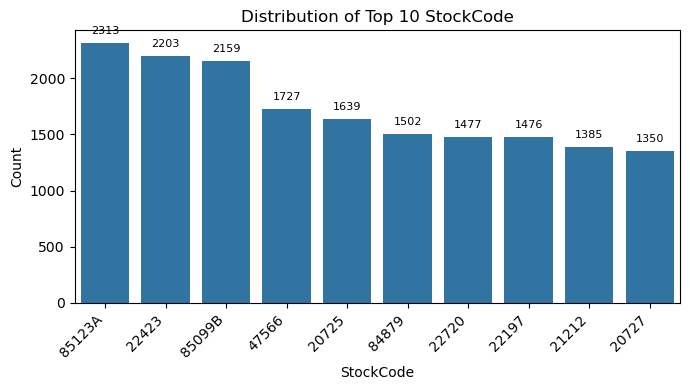

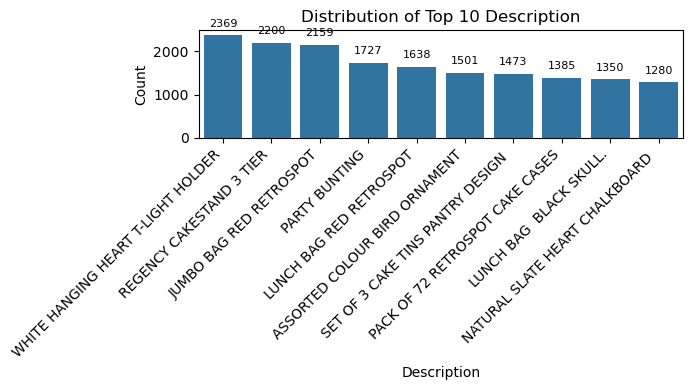

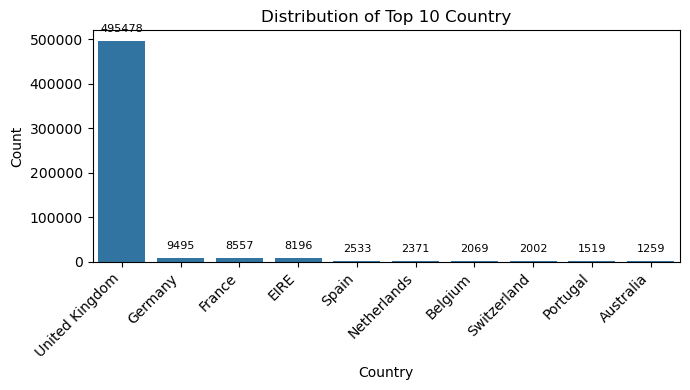

In [29]:
# Visualisasi distribusi kolom kategorikal (Top-N kategori)
categorical_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']
top_n = 10  # jumlah kategori teratas yang ingin ditampilkan

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    
    # Ambil hanya Top-N kategori berdasarkan frekuensi
    top_categories = df[col].value_counts().nlargest(top_n).index
    filtered_df = df[df[col].isin(top_categories)]
    
    ax = sns.countplot(data=filtered_df, x=col, order=top_categories)
    plt.title(f'Distribution of Top {top_n} {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

    # Menambahkan label jumlah di atas setiap batang
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(count,
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Berdasarkan visualisasi distribusi beberapa kolom kategorikal pada dataset Online Retail, diperoleh insight sebagai berikut:

#### 1. InvoiceNo
- Nilai `InvoiceNo` dengan jumlah transaksi terbanyak adalah `573585`, yang muncul sebanyak 1.114 kali.
- Hal ini menunjukkan bahwa invoice tersebut mungkin merupakan transaksi besar atau transaksi yang terdiri dari banyak item yang tercatat secara terpisah.

#### 2. StockCode
- Produk dengan `StockCode` paling sering muncul adalah 85123A, dengan total 2.313 kali kemunculan.
- Kode ini kemungkinan merepresentasikan produk populer atau barang dengan perputaran tinggi di gudang dan penjualan.

#### 3. Description
- Produk dengan deskripsi terbanyak adalah:
  - White Hanging Heart T-Light Holder sebanyak 2.369 kali
  - Regency Cakestand 3 Tier sebanyak 2.200 kali
  - Jumbo Bag Red Retrospot sebanyak 2.159 kali.
- Ini mengindikasikan bahwa ketiga produk tersebut merupakan produk favorit pelanggan dan dapat dipertimbangkan sebagai bagian dari strategi rekomendasi berbasis popularitas.

#### 4. Country
- United Kingdom mendominasi jumlah transaksi dengan 495.478 transaksi, atau sekitar 90% dari total data, mengingat perusahaan ini berbasis di Inggris.
- Disusul oleh:
  - Jerman (Germany) sebanyak 9.495 transaksi
  - Prancis (France) sebanyak 8.557 transaksi.
- Fakta ini penting dalam mempertimbangkan segmentasi pelanggan dan potensi penggunaan model rekomendasi berbasis regional.

## Jumlah Transaksi per Bulan

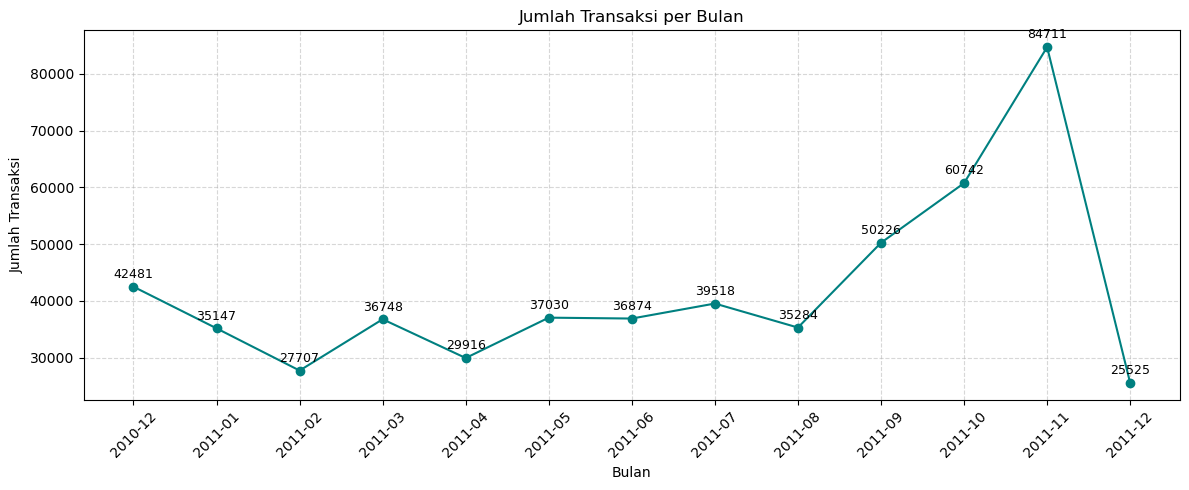

In [32]:
# Pastikan InvoiceDate dalam datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Hitung jumlah transaksi per bulan
monthly_counts = df['InvoiceDate'].dt.to_period('M').value_counts().sort_index()
x = monthly_counts.index.astype(str)
y = monthly_counts.values

# Buat line chart
plt.figure(figsize=(12, 5))
plt.plot(x, y, marker='o', linestyle='-', color='teal')

# Tambahkan label dengan jarak 1000 di atas titik
for i, value in enumerate(y):
    plt.text(x[i], value + 1000, str(value), ha='center', va='bottom', fontsize=9)

# Tambahan format
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Berdasarkan grafik line chart jumlah transaksi per bulan:

- Jumlah transaksi cenderung berfluktuasi sepanjang tahun 2011.
- Puncak transaksi terjadi pada bulan November 2011 sebanyak 84.711 transaksi, menunjukkan adanya lonjakan signifikan, kemungkinan karena musim belanja akhir tahun (*holiday season*).
- Setelah bulan November, terjadi penurunan drastis di bulan Desember 2011 menjadi 25.252 transaksi, yang kemungkinan disebabkan oleh:
  - Libur panjang akhir tahun
  - Penutupan operasional bisnis
  - Tidak lengkapnya pencatatan data bulan tersebut.
- Bulan dengan jumlah transaksi terendah adalah Februari 2011 dengan 27.107 transaksi.

## Top 10 Produk Berdasarkan Frekuensi Pembelian

/var/folders/7p/qv2nn6jx4210yx3pl4ljjy3h0000gn/T/ipykernel_18009/3099639894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M')
/var/folders/7p/qv2nn6jx4210yx3pl4ljjy3h0000gn/T/ipykernel_18009/3099639894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


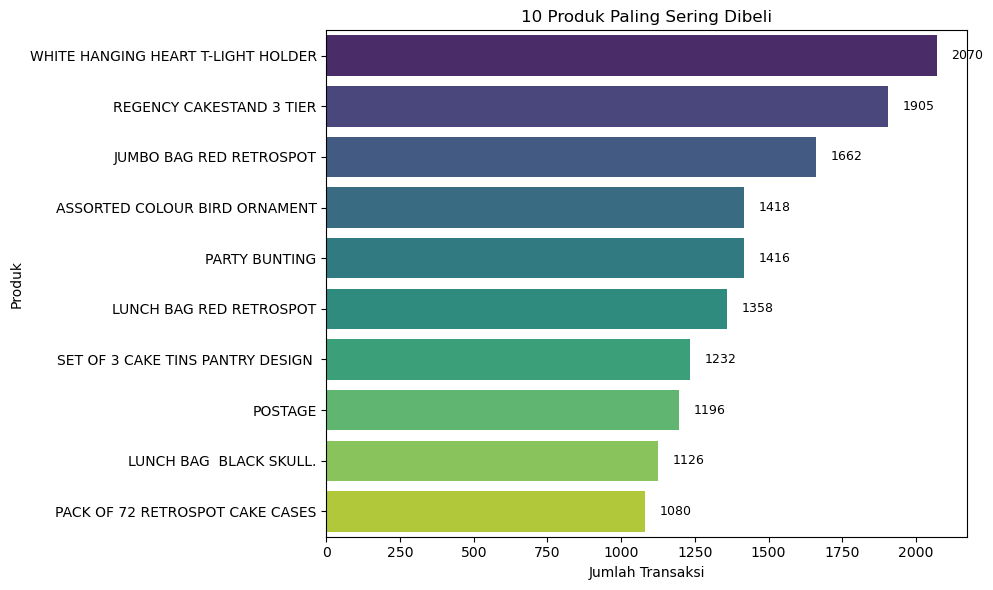

In [35]:
# Load dan parsing tanggal
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Hapus data yang kosong untuk CustomerID karena ini penting untuk sistem rekomendasi
df1 = df.dropna(subset=['CustomerID'])

# Buat kolom bulan
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M')

# Visualisasi Produk Berdasarkan Frekuensi Pembelian
top_products = df1['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('10 Produk Paling Sering Dibeli')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Produk')

# Label data
for i, value in enumerate(top_products.values):
    ax.text(value + 50, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa :

- Produk "WHITE HANGING HEART T-LIGHT HOLDER" merupakan produk paling sering dibeli dengan total 2.070 transaksi.

- Produk populer lainnya termasuk:

    - "REGENCY CAKESTAND 3 TIER" dengan 1.905 transaksi,

    - "JUMBO BAG RED RETROSPOT" sebanyak 1.662 transaksi,

    - serta "ASSORTED COLOUR BIRD ORNAMENT" dan "PARTY BUNTING", masing-masing dengan lebih dari 1.400 transaksi.

- Produk-produk yang mendominasi penjualan sebagian besar adalah barang dekorasi rumah dan tas belanja/jinjing.

- Seluruh produk pada daftar ini memiliki lebih dari 1.000 transaksi, menandakan adanya preferensi konsumen yang konsisten terhadap barang-barang tersebut.

## Top 10 Produk Berdasarkan Total Quantity

/var/folders/7p/qv2nn6jx4210yx3pl4ljjy3h0000gn/T/ipykernel_18009/2501005395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='magma')


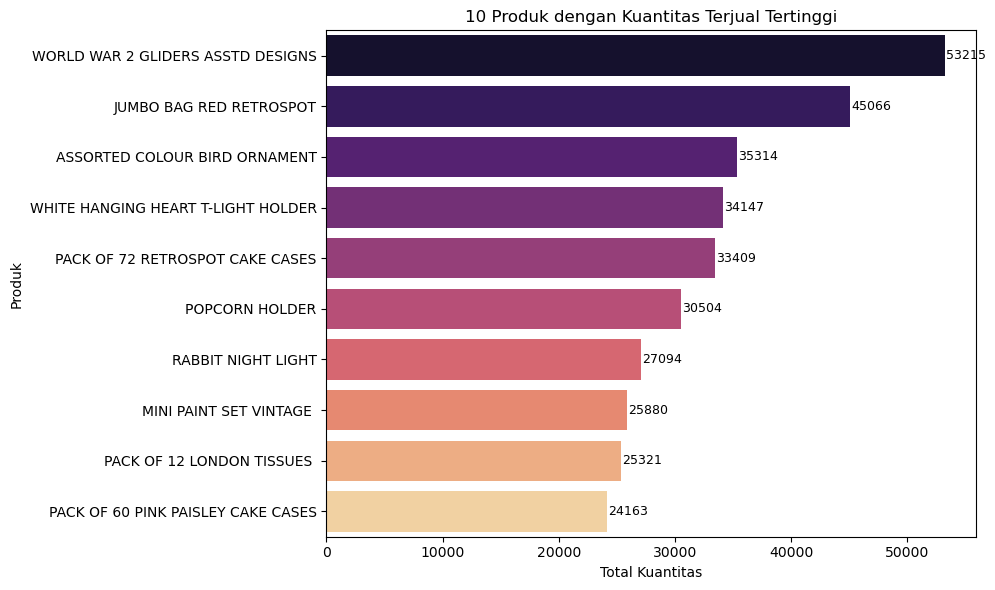

In [38]:
# Visualisasi Produk Berdasarkan Total Quantity
top_quantity = df1.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='magma')
plt.title('10 Produk dengan Kuantitas Terjual Tertinggi')
plt.xlabel('Total Kuantitas')
plt.ylabel('Produk')

# Label data
for i, value in enumerate(top_quantity.values):
    ax.text(value + 100, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()


Dari bar chart di atas, didapatkan :

- Produk dengan total kuantitas terjual tertinggi adalah "WORLD WAR 2 GLIDERS ASSTD DESIGNS" dengan 53.215 unit, menunjukkan tingkat pembelian dalam jumlah besar untuk produk ini.
- Produk lainnya dengan jumlah kuantitas tinggi:

    - "JUMBO BAG RED RETROSPOT" sebanyak 45.066 unit,

    - "ASSORTED COLOUR BIRD ORNAMENT" sebanyak 35.314 unit, dan

    - "WHITE HANGING HEART T-LIGHT HOLDER" sebanyak 34.147 unit.

- Beberapa produk yang sebelumnya juga muncul pada grafik frekuensi pembelian (seperti "JUMBO BAG RED RETROSPOT" dan "WHITE HANGING HEART T-LIGHT HOLDER") menunjukkan bahwa produk tersebut tidak hanya sering dibeli, tetapi juga dalam jumlah besar per transaksi.
- Produk-produk seperti "PACK OF 12 LONDON TISSUES" dan "MINI PAINT SET VINTAGE" juga memiliki volume penjualan tinggi, meskipun tidak selalu muncul dalam 10 besar dari segi jumlah transaksi.

## Top 10 Rata-rata Produk Dibeli per Transaksi

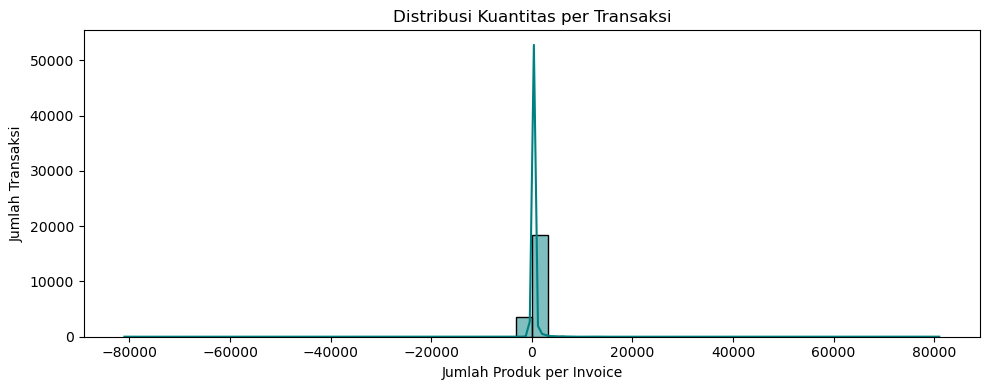

In [41]:
# Visualisasi Rata-rata Produk Dibeli per Transaksi
avg_items_per_invoice = df1.groupby('InvoiceNo')['Quantity'].sum()

plt.figure(figsize=(10, 4))
sns.histplot(avg_items_per_invoice, bins=50, kde=True, color='teal')
plt.title('Distribusi Kuantitas per Transaksi')
plt.xlabel('Jumlah Produk per Invoice')
plt.ylabel('Jumlah Transaksi')

# Label data
for i, value in enumerate(avg_items_per_invoice.values):
    ax.text(value + 100, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()

Dari distribusi di atas, diperoleh :
- Mayoritas transaksi memiliki jumlah produk yang relatif kecil per invoice, dengan puncak frekuensi berada di sekitar kuantitas 1 hingga 20 unit per transaksi.
- Terdapat outlier ekstrem, baik positif maupun negatif, yang menunjukkan ada transaksi dengan jumlah produk sangat tinggi (hingga >80.000) dan beberapa nilai negatif hingga -80.000, yang tidak masuk akal secara bisnis.
- Nilai-nilai ekstrim tersebut mengindikasikan kemungkinan adanya:
    - Kesalahan input data
    - Transaksi pengembalian (return) yang tercatat sebagai kuantitas negatif
    - Kebutuhan pembersihan data lebih lanjut

## Correlation Matrix

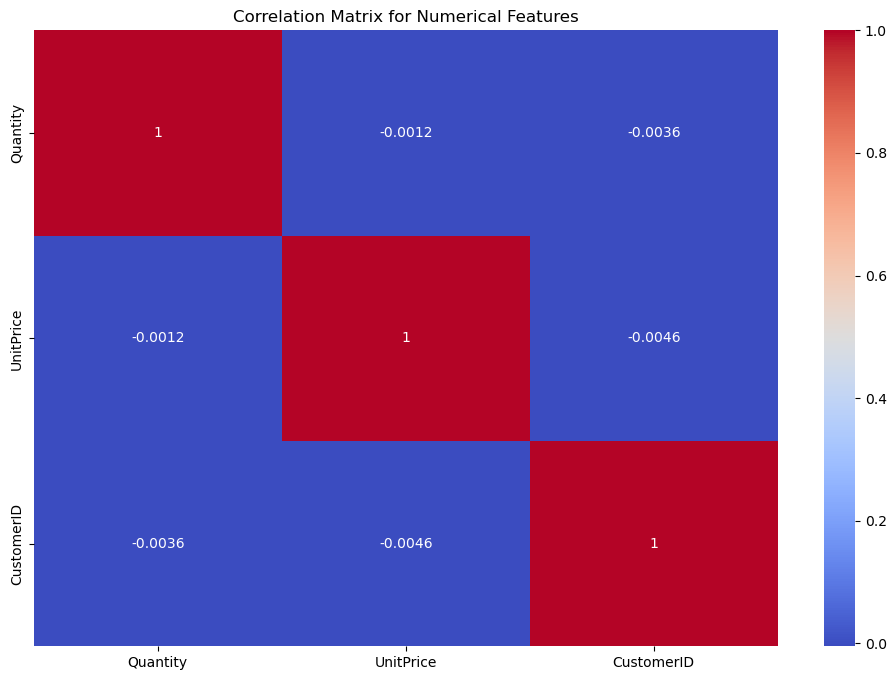

In [44]:
# Korelasi matriks untuk kolom numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Dari hasil korelasi antar fitur numerik, dapat disimpulkan :
- Korelasi antara Quantity dan UnitPrice sangat rendah (-0.0012), yang menunjukkan bahwa jumlah barang yang dibeli tidak berkaitan langsung dengan harga per unit.
- CustomerID juga tidak memiliki korelasi yang signifikan dengan Quantity (-0.0036) maupun UnitPrice (-0.0046). Hal ini wajar karena CustomerID adalah identifier kategorikal, bukan nilai numerik sejati.
- Semua nilai korelasi mendekati nol, yang menandakan tidak ada hubungan linear yang kuat antar fitur numerik ini. Karena fitur-fitur numerik ini tidak memiliki hubungan linear yang kuat, pendekatan sistem rekomendasi sebaiknya lebih berfokus pada interaksi pengguna dan item (Collaborative Filtering) atau karakteristik produk (Content-Based Filtering) daripada mengandalkan korelasi antar fitur numerik.

# **5. Data Preprocessing**

## Menghapus Missing Value

Pada saat pengecekan missing value, didapatkan adanya missing value pada kolom `Description` dan `CustomerID`. Karena kolom `Description` ini penting untuk analisis berbasis konten (content-based filtering), maka baris dengan nilai kosong pada kolom ini akan dihapus. Selain itu, untuk kebutuhan sistem rekomendasi berbasis pelanggan (seperti collaborative filtering), baris tanpa `CustomerID` akan dihapus, karena tidak dapat digunakan untuk membentuk profil pelanggan.

In [49]:
# Menghapus baris yang memiliki missing value pada kolom Description atau CustomerID
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean.shape

(406829, 8)

## Menghapus Data Duplikat

Pada saat pengecekan duplikat, didapatkan 5.268 data terduplikasi pada dataset. Oleh karena itu, akan dilakukan penghapusan pada data duplikat tersebut agar kualitas data tetap terjaga dan analisis yang dilakukan tidak bias akibat keberadaan data yang sama.

In [52]:
# Menghapus duplikat
df_clean = df_clean.drop_duplicates()
df_clean.shape

(401604, 8)

## Filtering Transaksi Tidak Valid

Kolom `Quantity` dan `UnitPrice` memiliki nilai yang ekstrem, seperti jumlah produk yang mencapai -80.995 dan harga produk per unit yang terendah yaitu -£11.062,06. Nilai-nilai tersebut jelas tidak masuk akal dalam konteks transaksi penjualan ritel dan kemungkinan besar merupakan hasil dari kesalahan pencatatan atau retur barang.

Oleh karena itu, dilakukan penghapusan data dengan nilai negatif pada kolom `Quantity` dan `UnitPrice` untuk menjaga kualitas dan konsistensi data. Langkah ini penting agar tidak memengaruhi hasil analisis atau performa sistem rekomendasi yang akan dibangun.

In [55]:
# Hapus transaksi yang tidak valid
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
df_clean.shape

(392692, 8)

In [56]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


## Feature Engineering

Sebelum membangun model sistem rekomendasi, dilakukan beberapa tahapan feature engineering untuk mempersiapkan data interaksi antara pelanggan dan produk. Pertama, dibuat kolom `TotalPrice` sebagai hasil perkalian `Quantity` dan `UnitPrice`, yang berfungsi sebagai representasi intensitas pembelian. Nilai ini dapat digunakan sebagai bobot preferensi pelanggan dalam pendekatan collaborative filtering. Selain itu, kolom `CustomerID` dikonversi ke dalam format string agar dikenali sebagai label unik oleh algoritma rekomendasi. Kolom `InvoiceDate` juga diekstraksi sehingga mendapat informasi tambahan seperti bulan, hari, dan jam transaksi yang berguna dalam context-aware recommendation.

In [59]:
# Buat kolom TotalPrice untuk kebutuhan analisis lebih lanjut
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Ubah tipe data CustomerID menjadi string
df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)

df_clean.shape

(392692, 9)

## Deteksi dan Penanganan Outlier

Sebelum melanjutkan ke tahap analisis lebih lanjut, dilakukan pengecekan outlier pada semua fitur numerik di dataset. Pengecekan ini menggunakan metode Interquartile Range (IQR) untuk mengidentifikasi data yang berada jauh di luar rentang normal.

In [62]:
# Fungsi untuk cek outlier berdasarkan IQR

# Mendapatkan kolom numerik
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi dictionary untuk menyimpan bounds
iqr_bounds = {}

# Hitung bound IQR untuk semua kolom numerik
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_bounds[col] = (lower_bound, upper_bound)

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f'{col}')
    print(f'Jumlah outlier: {outliers.shape[0]} dari {df_clean.shape[0]} data ({outliers.shape[0]/df_clean.shape[0]*100:.2f}%)')
    print(f'Bound bawah: {lower_bound:.2f}, Bound atas: {upper_bound:.2f}\n')

Quantity
Jumlah outlier: 25616 dari 392692 data (6.52%)
Bound bawah: -13.00, Bound atas: 27.00

UnitPrice
Jumlah outlier: 34112 dari 392692 data (8.69%)
Bound bawah: -2.50, Bound atas: 7.50

TotalPrice
Jumlah outlier: 31231 dari 392692 data (7.95%)
Bound bawah: -17.32, Bound atas: 42.07



Berdasarkan hasil deteksi outlier menggunakan metode IQR, didapatkan bahwa:

- `Quantity` memiliki 25.616 outlier atau sekitar 6.52% dari total data. Rentang nilai normal berdasarkan IQR adalah dari -13.00 hingga 27.00. Meskipun nilai negatif seharusnya telah dihapus sebelumnya, bound bawah tetap negatif karena metode IQR mempertimbangkan distribusi kuartil, bukan nilai aktual tersaring. Mengingat sistem rekomendasi berbasis interaksi pengguna sangat bergantung pada jumlah pembelian, maka nilai Quantity yang ekstrem dapat menyebabkan bias terhadap produk tertentu dan sebaiknya dihapus.

- `UnitPrice` memiliki 34.112 outlier atau sekitar 8.69% dari total data, dengan batas bawah -2.50 dan batas atas 7.50. Artinya, sebagian besar harga produk berada di bawah £7.50, dan nilai yang jauh lebih tinggi dianggap outlier oleh distribusi IQR. Nilai harga yang tidak wajar dapat menimbulkan distorsi pada penilaian preferensi pengguna, terutama jika digunakan dalam model hybrid yang menggabungkan content-based dan collaborative filtering.

- `TotalPrice` menunjukkan 31.231 outlier atau sekitar 7.95% dari total data, dengan rentang nilai normal dari -17.32 hingga 42.07. Ini menunjukkan bahwa sebagian kecil transaksi memiliki nilai total pembelian yang sangat tinggi dan berpotensi mendistorsi analisis jika tidak ditangani. Karena `TotalPrice` digunakan sebagai representasi kekuatan interaksi antara pengguna dan produk, menghapus nilai ekstrim membantu menjaga stabilitas bobot preferensi dalam model rekomendasi.

Karena jumlah outlier masih di bawah 10% dari keseluruhan data, penghapusan dianggap sebagai pendekatan yang aman dan efektif untuk menjaga kualitas dan kestabilan data, serta mencegah model rekomendasi belajar dari pola yang tidak representatif.

In [64]:
# Daftar kolom yang ingin difilter dari outlier
target_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

# Terapkan filter untuk menghapus outlier dari ketiga kolom
for col in target_cols:
    lower, upper = iqr_bounds[col]
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# Cek hasil akhir
df_clean.shape

(323725, 9)

## Feature Selection

Kolom `InvoiceNo` dan `StockCode` akan dihapus karena tidak memberikan nilai tambah dalam pembangunan sistem rekomendasi. `InvoiceNo` hanya merupakan identifikasi transaksi, sementara `StockCode` lebih relevan untuk pengelolaan inventaris daripada analisis preferensi pengguna. Sebagai gantinya, `Description` digunakan sebagai representasi produk.

In [67]:
# Hapus kolom yang tidak relevan untuk sistem rekomendasi
df_clean = df_clean.drop(['InvoiceNo', 'StockCode'], axis=1)

In [68]:
df_clean.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
